# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [46]:
#Karla González Sánchez A01541526

# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [47]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [48]:
print(dataset.shape)

dataset.head()


(150, 5)


,Dato1,Dato2,Dato3,Dato4,Dato5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [49]:
dataset = dataset.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [50]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
#Visualize the dataset
#dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [51]:
# Drop out non necesary columns
dataset.drop(['Dato1', 'Dato2', 'Dato3', 'Dato4', 'Dato5'],axis='columns',inplace=True)

#Visualize the dataset
dataset


""
0
1
2
3
4
...
145
146
147
148


5. Scatter plot of the data

In [52]:
plt.scatter(dataset.Dato2,dataset.Dato1)
plt.title('Dato1 vs Dato2')
plt.xlabel('Dato2')
plt.ylabel('Dato1')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Dato2'

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [53]:
df1 = dataset[dataset.Dato1==1]
df2 = dataset[dataset.Dato2==2]

plt.scatter(df1.Dato1, df1.Dato3, Label='datos 1 y 3')
plt.scatter(df2.Dato2, df2.Dato2, Label='dato 2')

plt.title('Datos 1 y 3 vs Dato 2')
plt.xlabel('Dato1')
plt.ylabel('')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Dato1'

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [54]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=2)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Dato1','Dato2']])

# Print estimated cluster of each point in the dataser
yp

KeyError: "None of [Index(['Dato1', 'Dato2'], dtype='object')] are in the [columns]"

In [55]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

# Visualize the dataset
dataset

NameError: name 'yp' is not defined

In [56]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

AttributeError: 'DataFrame' object has no attribute 'Cluster1'

In [57]:
# Center of each cluster
km.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [58]:
# Sum of squared error
km.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [59]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]

plt.scatter(df1.Dato1, df1.Dato1, Label='Dato 1')
plt.scatter(df2.Dato2, df2.Dato2, Label='Dato 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Dato 1 vs Dato 2')
plt.xlabel('Dato 1')
plt.ylabel('Dato 2')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Cluster1'

Plot real clusters and visual comparison

In [60]:
df1 = dataset[dataset.Dato1==1]
df2 = dataset[dataset.Dato2==2]

plt.scatter(df1.Dato1, df1.Dato1, Label='Dato 1')
plt.scatter(df2.Dato2, df2.Dato2, Label='Dato 2')

plt.title('Dato 1 vs Dato 2')
plt.xlabel('Dato 1')
plt.ylabel('Dato 2')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Dato1'

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [61]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Dato 1','Dato 2']])
    sse.append(km.inertia_)

KeyError: "None of [Index(['Dato 1', 'Dato 2'], dtype='object')] are in the [columns]"

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

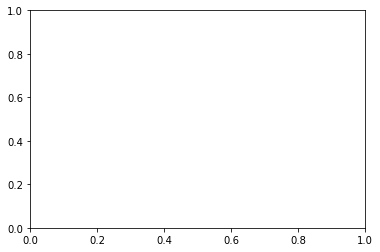

In [62]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible





5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?